In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import eda
%matplotlib inline
import seaborn as sns

from scipy.stats import skew

In [2]:
data = pd.read_csv("data/cust_seg.csv", low_memory=False)

In [3]:
data.head()

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0


## Data Information and Correlation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1000000 non-null  int64  
 1   fecha_dato             1000000 non-null  object 
 2   ncodpers               1000000 non-null  int64  
 3   ind_empleado           989218 non-null   object 
 4   pais_residencia        989218 non-null   object 
 5   sexo                   989214 non-null   object 
 6   age                    1000000 non-null  object 
 7   fecha_alta             989218 non-null   object 
 8   ind_nuevo              989218 non-null   float64
 9   antiguedad             1000000 non-null  object 
 10  indrel                 989218 non-null   float64
 11  ult_fec_cli_1t         1101 non-null     object 
 12  indrel_1mes            989218 non-null   float64
 13  tiprel_1mes            989218 non-null   object 
 14  indresi            

In [5]:
data.corr

<bound method DataFrame.corr of         Unnamed: 0  fecha_dato  ncodpers ind_empleado pais_residencia sexo  \
0                0  2015-01-28   1375586            N              ES    H   
1                1  2015-01-28   1050611            N              ES    V   
2                2  2015-01-28   1050612            N              ES    V   
3                3  2015-01-28   1050613            N              ES    H   
4                4  2015-01-28   1050614            N              ES    V   
...            ...         ...       ...          ...             ...  ...   
999995      999995  2015-02-28   1183296            N              ES    H   
999996      999996  2015-02-28   1183295            N              ES    H   
999997      999997  2015-02-28   1183294            N              ES    V   
999998      999998  2015-02-28   1183293            N              ES    V   
999999      999999  2015-02-28   1183289            N              ES    H   

        age  fecha_alta  ind_nu

In [6]:
data = data.drop(columns="Unnamed: 0")

In [7]:
data.corr()

C:\Users\pjalp\AppData\Local\Temp\ipykernel_22796\1185648202.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ncodpers,ind_nuevo,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
ncodpers,1.000000,0.002898,0.011554,0.001253,NaN,-0.040761,-0.187022,-0.088417,-0.013469,-0.005766,...,-0.100045,-0.125874,-0.027066,-0.189129,-0.190208,-0.177782,-0.073552,-0.138254,-0.152622,-0.163071
ind_nuevo,0.002898,1.000000,0.026681,0.268051,NaN,-0.000279,0.008165,-0.000986,-0.000296,-0.000139,...,-0.002224,-0.002701,-0.001432,-0.003034,-0.004998,-0.004265,-0.001789,-0.004081,-0.004497,-0.005767
indrel,0.011554,0.026681,1.000000,0.004462,NaN,0.001728,-0.030518,-0.000745,-0.000447,-0.000210,...,-0.002745,-0.003067,-0.001219,-0.005014,-0.005641,-0.003062,-0.002699,-0.005771,-0.005919,-0.005887
indrel_1mes,0.001253,0.268051,0.004462,1.000000,NaN,-0.000779,-0.000859,0.000615,-0.000088,-0.000041,...,-0.000659,-0.000800,-0.000424,-0.001801,-0.001127,-0.001333,-0.000530,-0.000162,-0.000319,-0.000852
tipodom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cod_prov,-0.040761,-0.000279,0.001728,-0.000779,NaN,1.000000,0.025574,-0.013720,0.001998,0.000567,...,-0.006910,0.001241,-0.012453,0.003694,0.006096,0.012109,0.003906,0.007072,0.008223,0.012603
ind_actividad_cliente,-0.187022,0.008165,-0.030518,-0.000859,NaN,0.025574,1.000000,0.036270,0.004421,0.005510,...,0.086716,0.104347,0.031839,0.205940,0.225788,0.172032,0.035252,0.240178,0.253776,0.382317
renta,-0.088417,-0.000986,-0.000745,0.000615,NaN,-0.013720,0.036270,1.000000,0.002655,0.002259,...,0.002591,0.022622,-0.007544,0.040447,0.029966,0.033463,0.011001,0.015686,0.018120,0.023436
ind_ahor_fin_ult1,-0.013469,-0.000296,-0.000447,-0.000088,NaN,0.001998,0.004421,0.002655,1.000000,-0.000083,...,0.001689,0.007171,-0.000910,0.007578,0.000697,0.005423,0.013962,-0.000491,-0.000858,0.003143
ind_aval_fin_ult1,-0.005766,-0.000139,-0.000210,-0.000041,NaN,0.000567,0.005510,0.002259,-0.000083,1.000000,...,-0.000627,0.001915,-0.000427,0.012449,0.011230,0.011909,-0.000503,0.012582,0.011807,0.012694


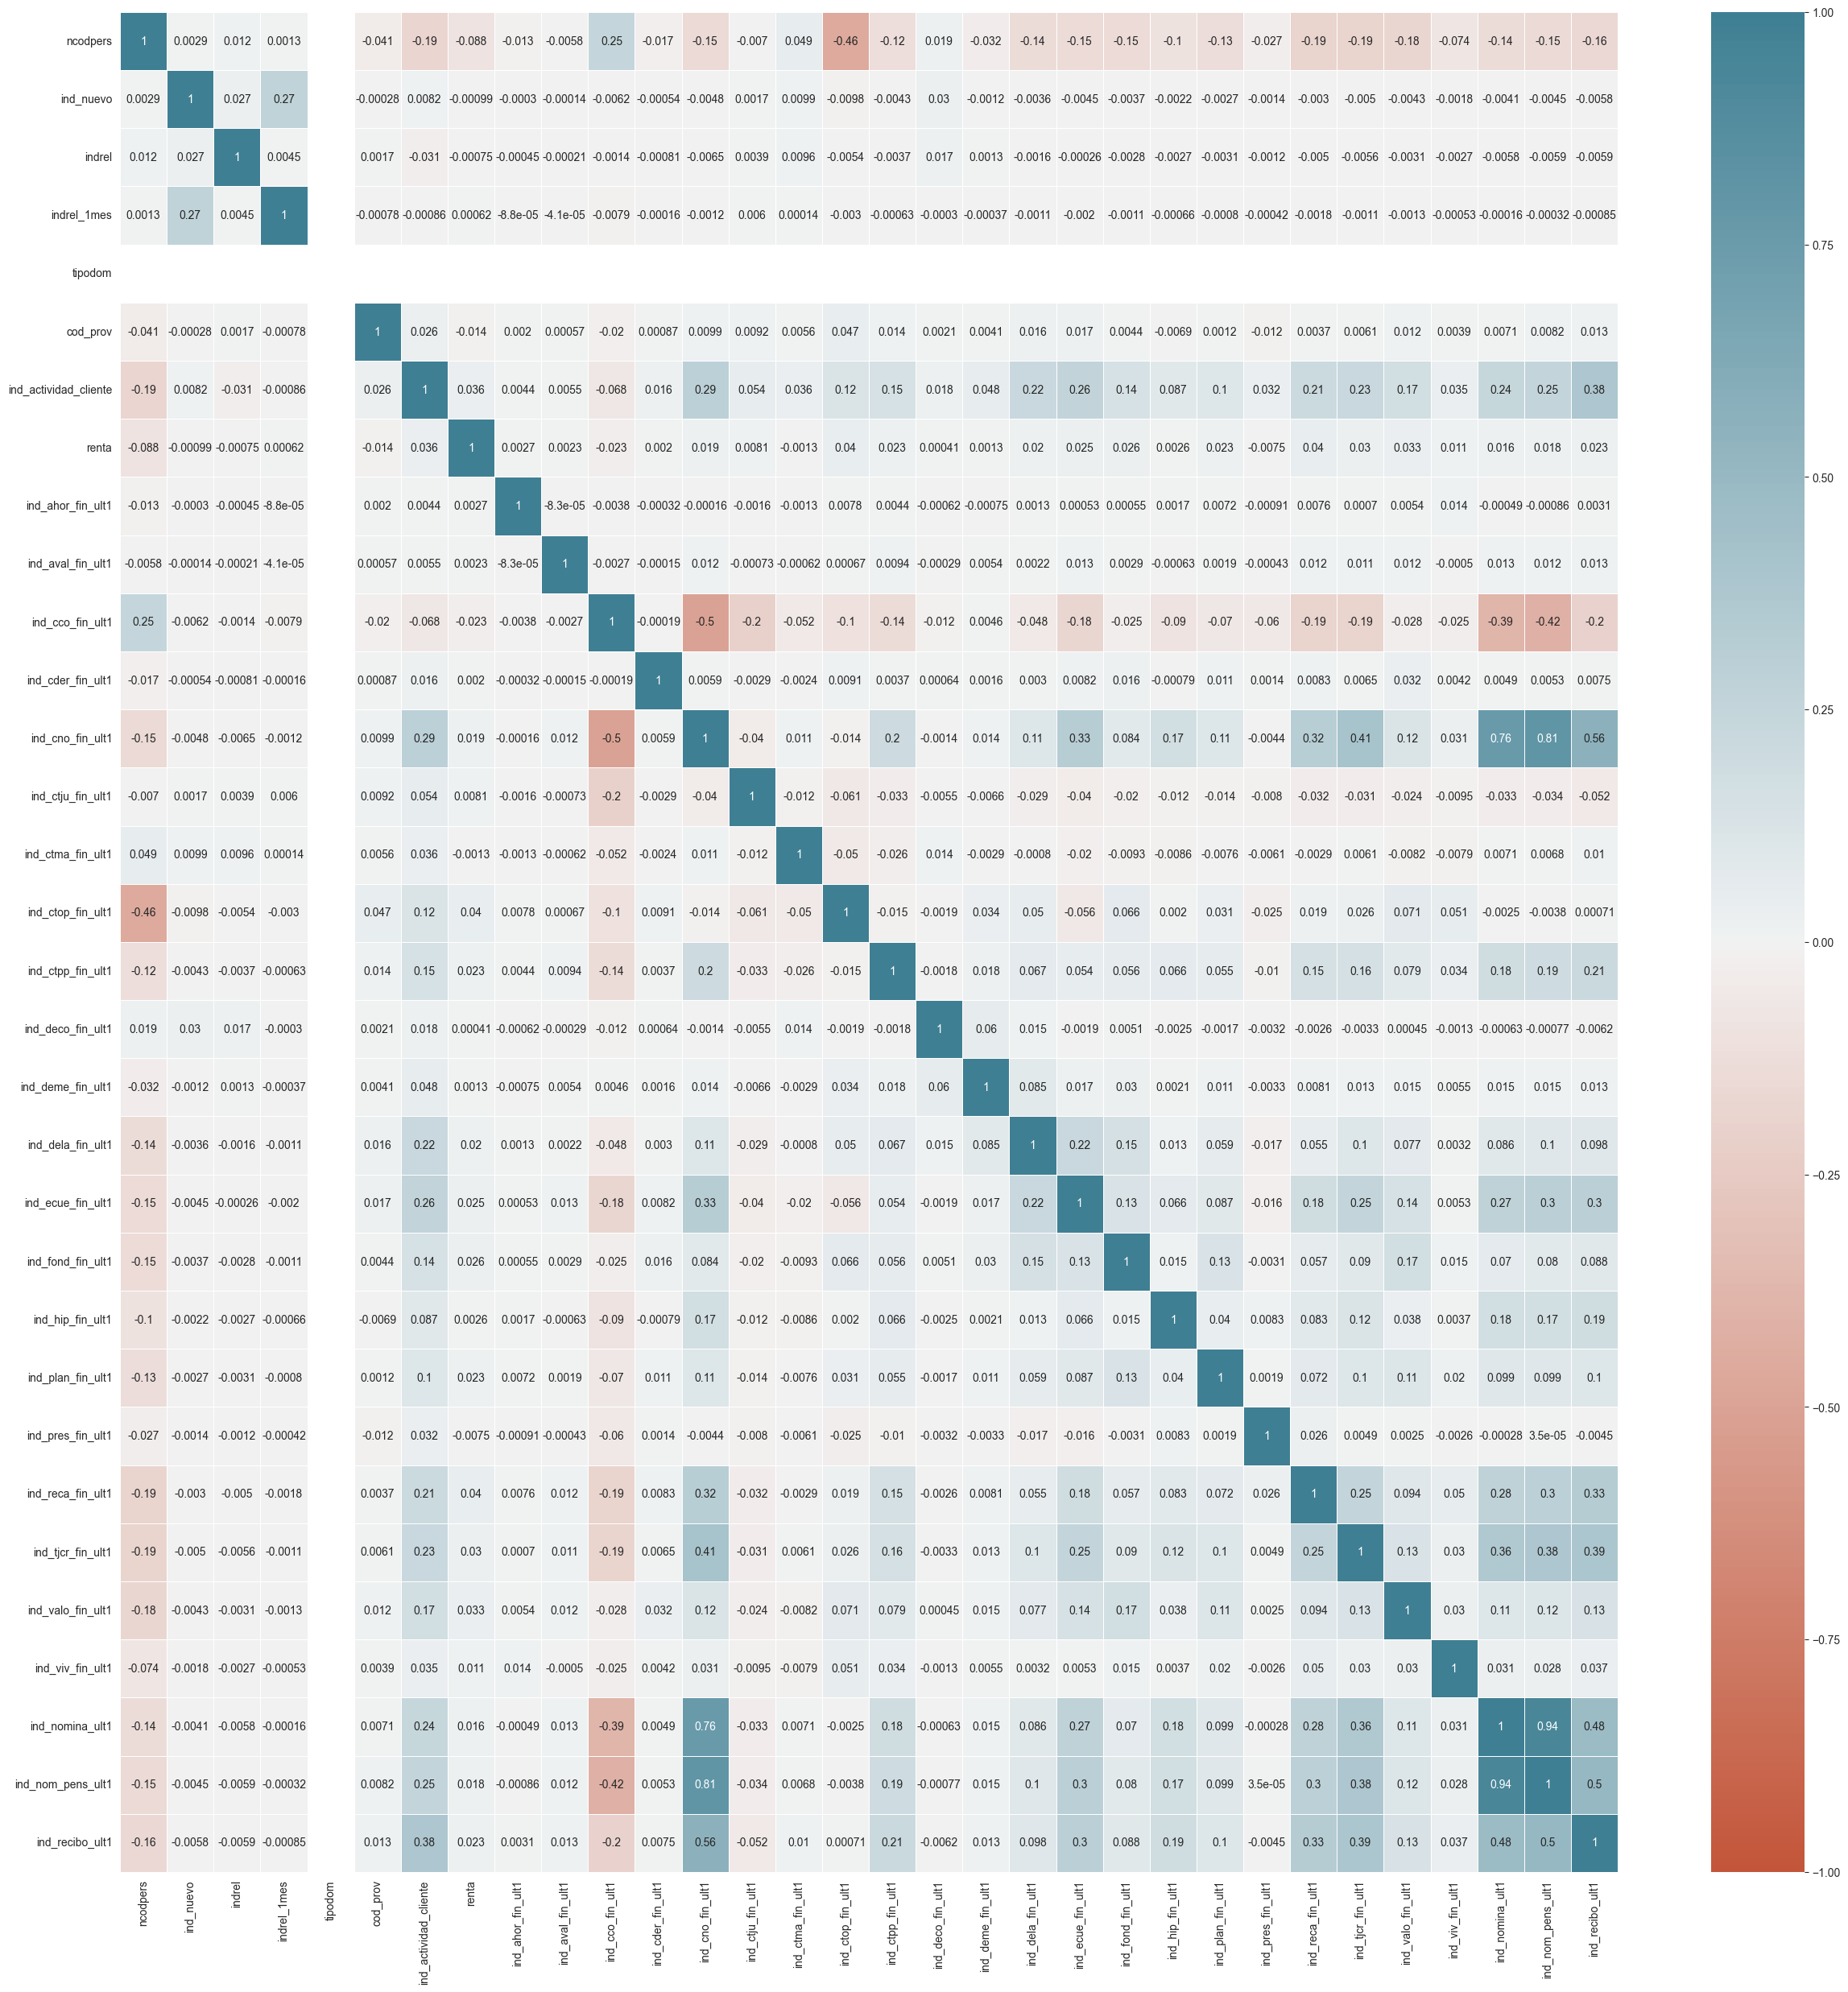

In [8]:
numbers = data.select_dtypes(['int64', 'float64']).columns.to_list()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(data[numbers].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

## Types of Data

In [9]:
data.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes              float64
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_fin_ult1          int64
ind_ctop_f

## NULL VALUES

In [10]:
data.isnull().sum()

fecha_dato                    0
ncodpers                      0
ind_empleado              10782
pais_residencia           10782
sexo                      10786
age                           0
fecha_alta                10782
ind_nuevo                 10782
antiguedad                    0
indrel                    10782
ult_fec_cli_1t           998899
indrel_1mes               10782
tiprel_1mes               10782
indresi                   10782
indext                    10782
conyuemp                 999822
canal_entrada             10861
indfall                   10782
tipodom                   10782
cod_prov                  17734
nomprov                   17734
ind_actividad_cliente     10782
renta                    175183
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop_fin_ult1             0
ind_ctpp

## SKEW DATA

In [11]:
data.skew()

C:\Users\pjalp\AppData\Local\Temp\ipykernel_22796\3054720965.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


ncodpers                   0.032278
ind_nuevo                 45.175718
indrel                    29.924507
indrel_1mes              153.451384
tipodom                    0.000000
cod_prov                  -0.151212
ind_actividad_cliente     -0.262105
renta                     52.234130
ind_ahor_fin_ult1         75.144758
ind_aval_fin_ult1        160.119026
ind_cco_fin_ult1          -1.152401
ind_cder_fin_ult1         41.098090
ind_cno_fin_ult1           2.571915
ind_ctju_fin_ult1          8.391620
ind_ctma_fin_ult1          9.903618
ind_ctop_fin_ult1          1.405709
ind_ctpp_fin_ult1          3.309287
ind_deco_fin_ult1         21.456830
ind_deme_fin_ult1         17.733145
ind_dela_fin_ult1          3.467512
ind_ecue_fin_ult1          2.555226
ind_fond_fin_ult1          5.815247
ind_hip_fin_ult1           9.858534
ind_plan_fin_ult1          8.107362
ind_pres_fin_ult1         14.544812
ind_reca_fin_ult1          3.294845
ind_tjcr_fin_ult1          3.493287
ind_valo_fin_ult1          4

In [12]:
# skew(data)

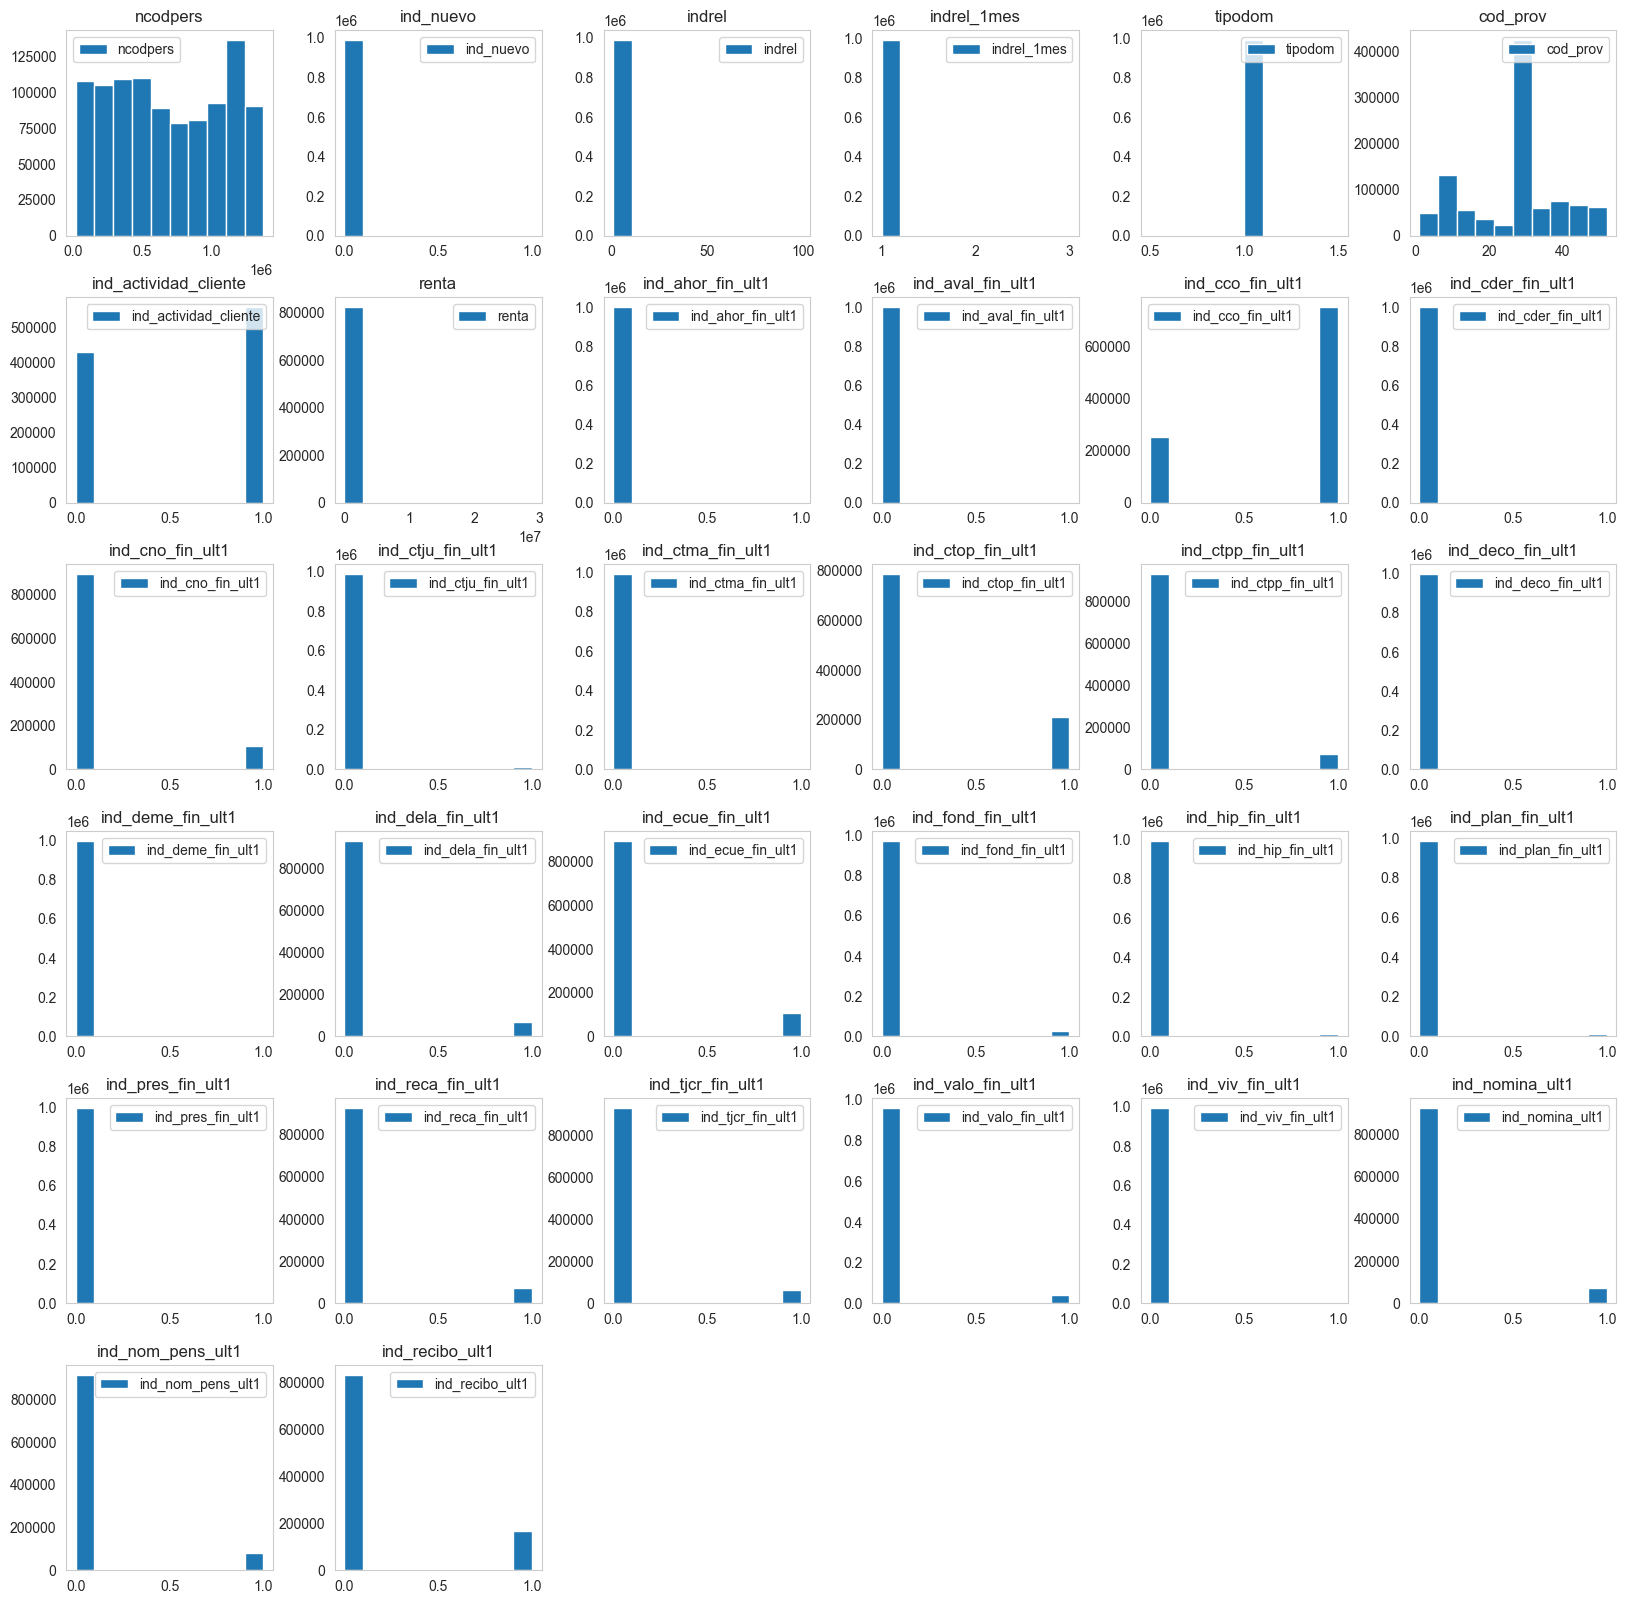

In [14]:
data.hist(figsize=(20,20), legend=True, grid=False)
plt.show()

Preview of data:


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   fecha_dato             1000000 non-null  object 
 1   ncodpers               1000000 non-null  int64  
 2   ind_empleado           989218 non-null   object 
 3   pais_residencia        989218 non-null   object 
 4   sexo                   989214 non-null   object 
 5   age                    1000000 non-null  object 
 6   fecha_alta             989218 non-null   object 
 7   ind_nuevo              989218 non-null   float64
 8   antiguedad             1000000 non-null  object 
 9   indrel                 989218 non-null   float64
 10  ult_fec_cli_1t         1101 non-null     object 
 11  indrel_1mes            989218 non-null   float64
 12  tiprel_1mes            989218 non-null   obj

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


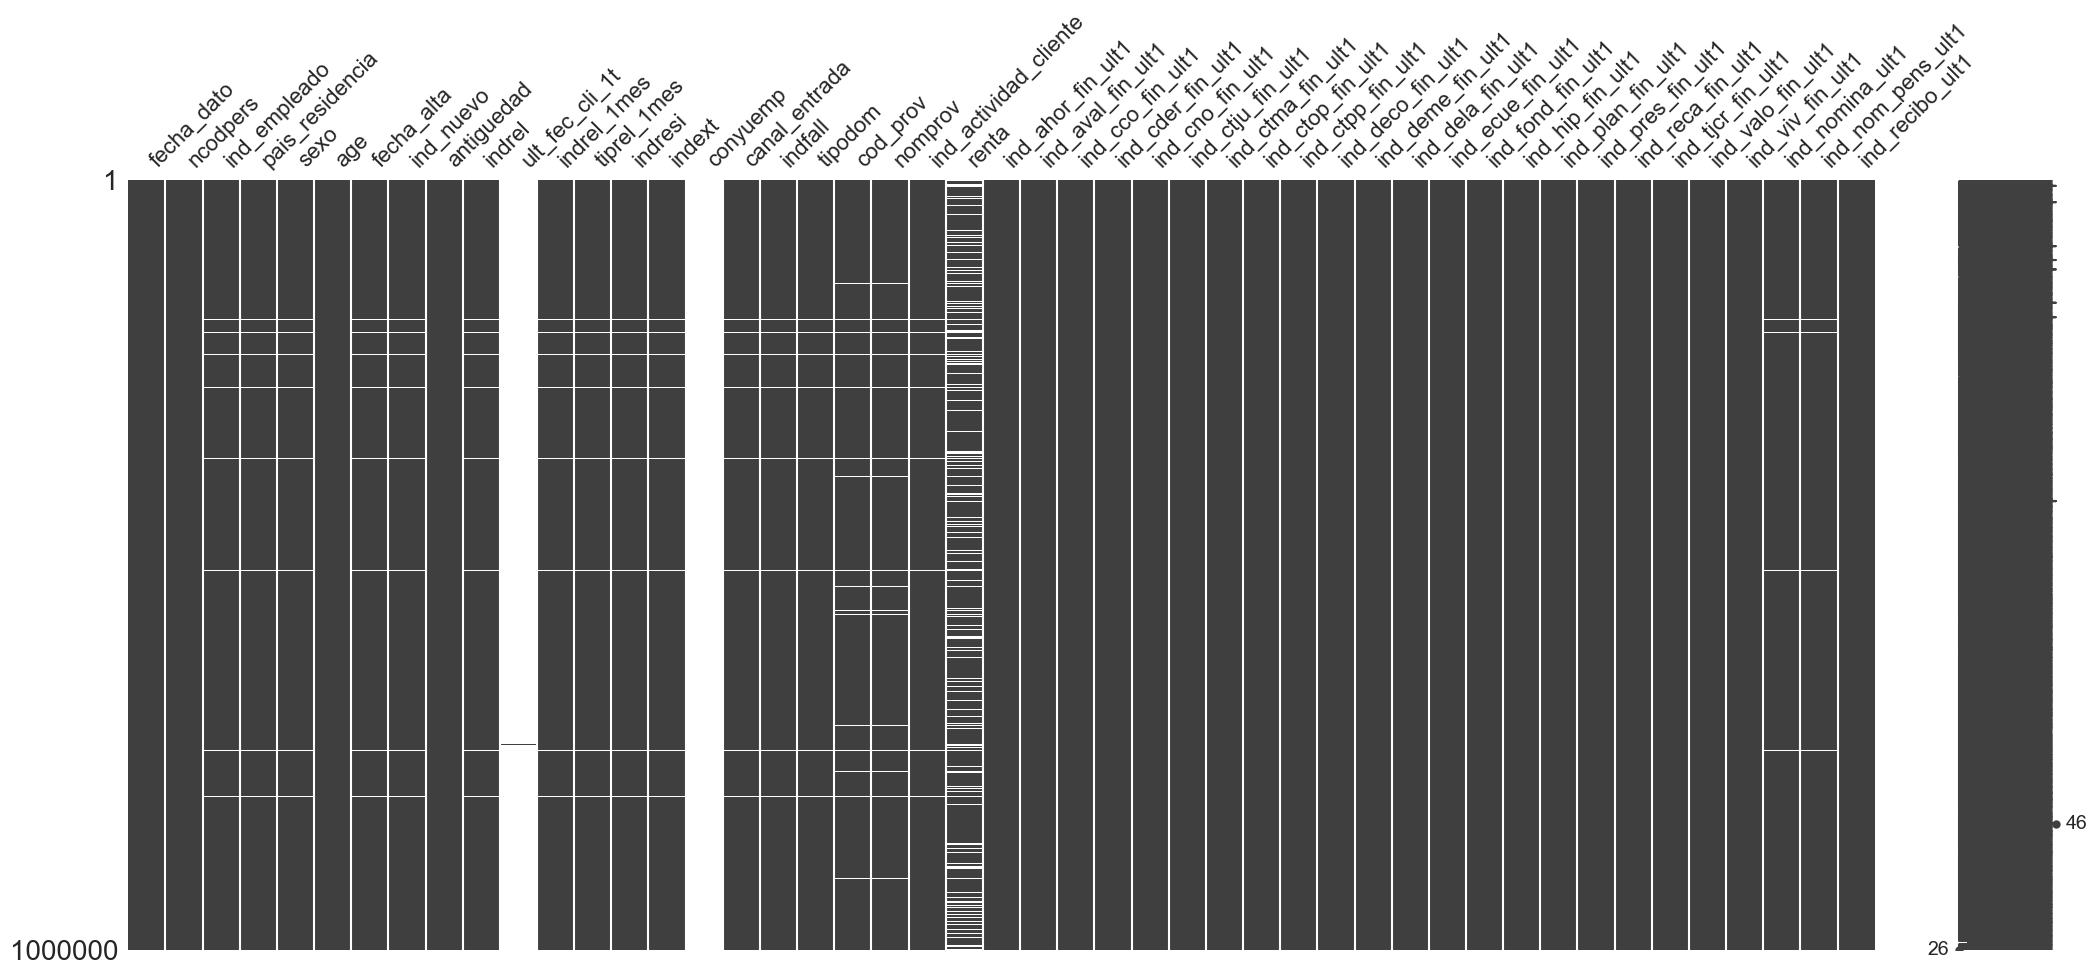


No duplicated entries found

To check: 
Unique count of non-numeric data

fecha_dato            2
ind_empleado          5
pais_residencia     113
sexo                  2
age                 115
fecha_alta         6238
antiguedad          249
ult_fec_cli_1t       22
tiprel_1mes           3
indresi               2
indext                2
conyuemp              2
canal_entrada       156
indfall               2
nomprov              52
dtype: int64
Top 5 unique values of fecha_dato
   fecha_dato   Count
0  2015-01-28  625457
1  2015-02-28  374543
 
Top 5 unique values of ind_empleado
  ind_empleado   Count
0            N  988260
1            B     387
2            A     287
3            F     282
4            S       2
 
Top 5 unique values of pais_residencia
  pais_residencia   Count
0              ES  982264
1              FR     546
2              AR     542
3              DE     487
4              GB     480
 
Top 5 unique values of sexo
  sexo   Count
0    V  562000
1    H  427214
 
To

,count,mean,std,min,25%,50%,75%,max
ncodpers,1000000.0,690596.670395,404408.432011,15889.00,336411.00,664476.00,1074511.25,1379131.00
ind_nuevo,989218.0,0.000489,0.022114,0.00,0.00,0.00,0.00,1.00
indrel,989218.0,1.109074,3.267624,1.00,1.00,1.00,1.00,99.00
indrel_1mes,989218.0,1.000085,0.012954,1.00,1.00,1.00,1.00,3.00
tipodom,989218.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
cod_prov,982266.0,26.852131,12.422924,1.00,18.00,28.00,33.00,52.00
ind_actividad_cliente,989218.0,0.564971,0.495761,0.00,0.00,1.00,1.00,1.00
renta,824817.0,139646.150940,238985.824907,1202.73,71571.84,106651.86,163432.47,28894395.51
ind_ahor_fin_ult1,1000000.0,0.000177,0.013303,0.00,0.00,0.00,0.00,1.00
ind_aval_fin_ult1,1000000.0,0.000039,0.006245,0.00,0.00,0.00,0.00,1.00


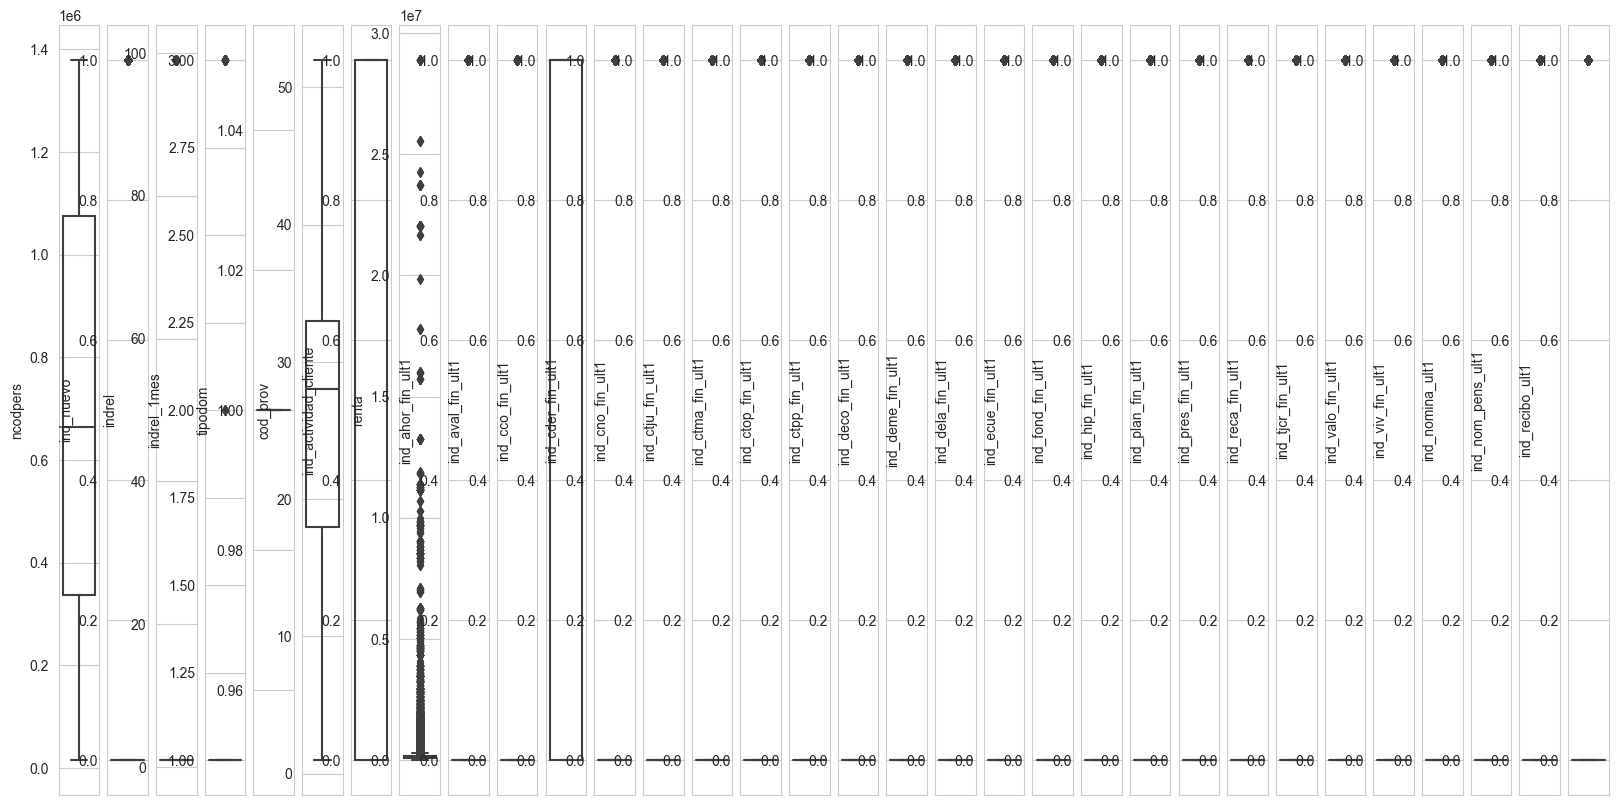


To check pairwise joint distribution of numeric data



To check time series of numeric data  by daily, monthly and yearly frequency


In [16]:
import eda
eda.eda(data)

LinAlgError: singular matrix

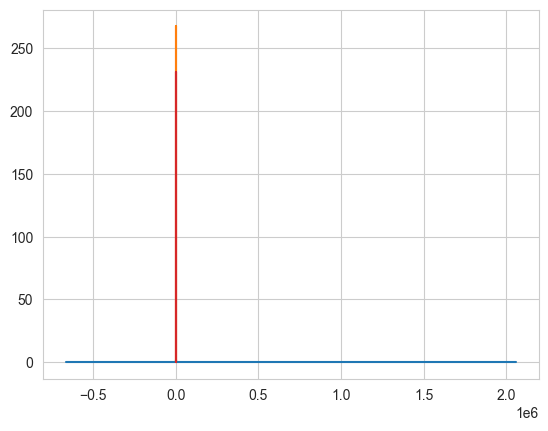

In [17]:
data.plot.density()

In [ ]:
data.plotting.bootstrap_plot()

MemoryError: Unable to allocate 34.1 GiB for an array with shape (4574357078,) and data type float64

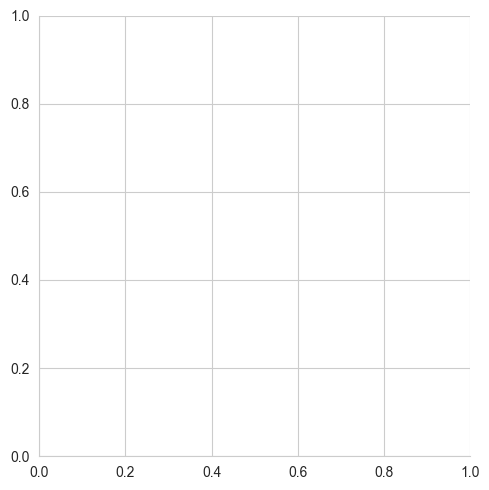

In [18]:
sns.displot(data)

In [19]:
numericData = data.select_dtypes(include= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

LinAlgError: singular matrix

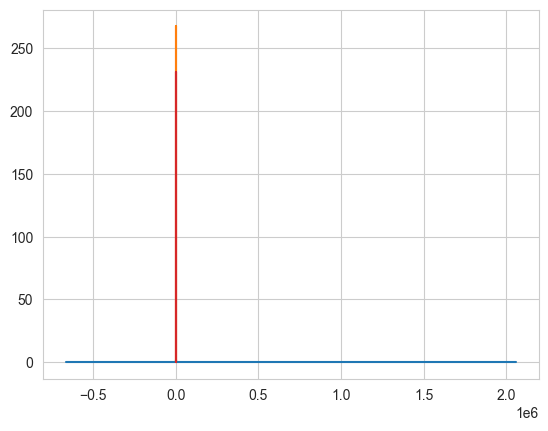

In [21]:
numericData.plot.kde()

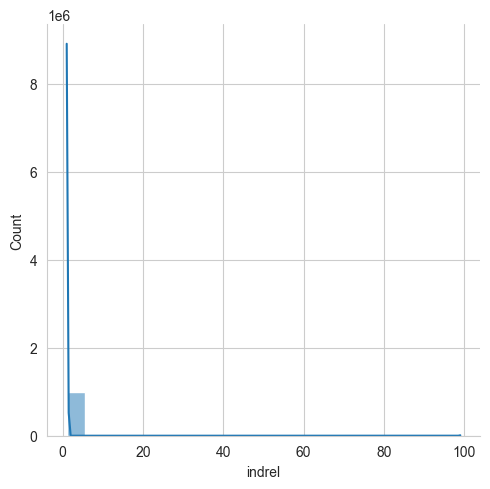

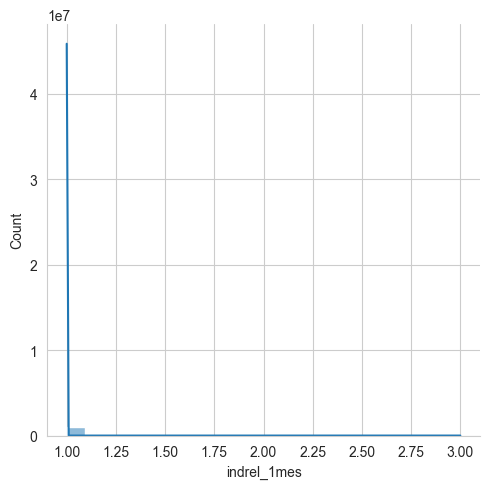

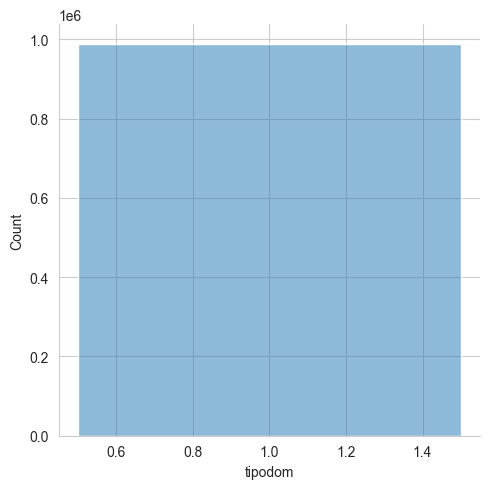

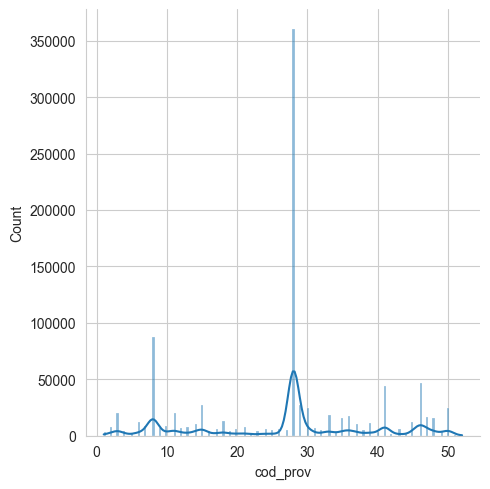

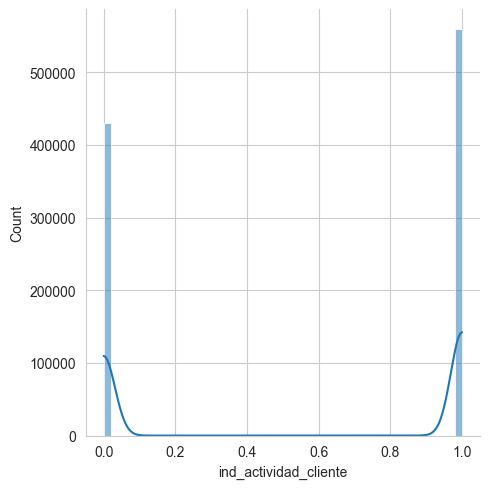

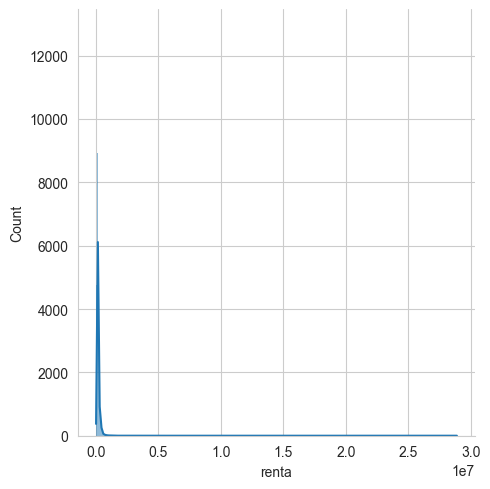

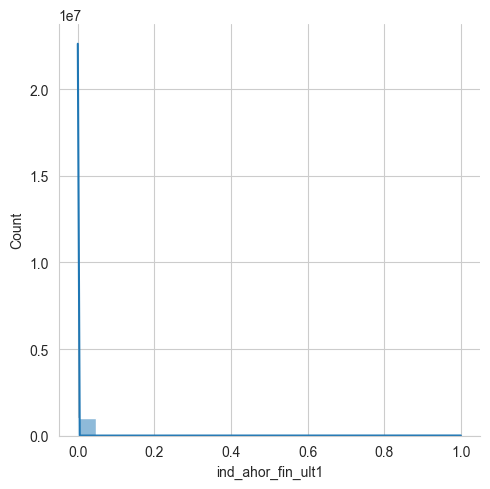

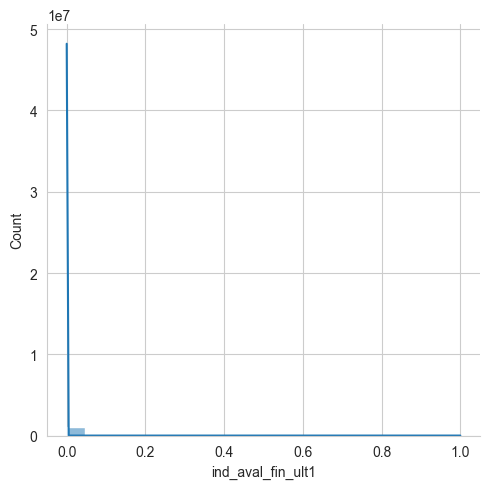

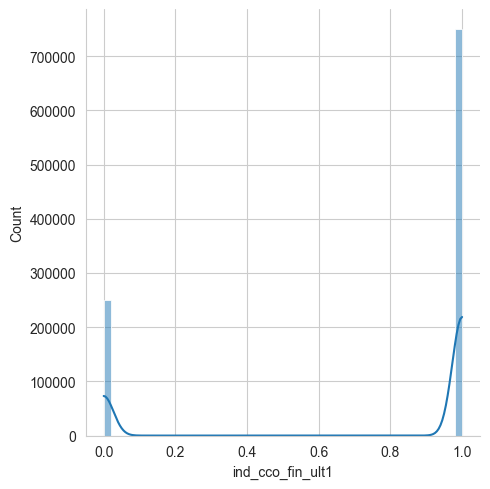

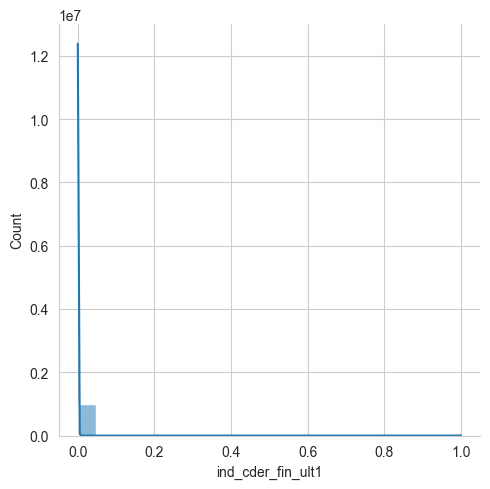

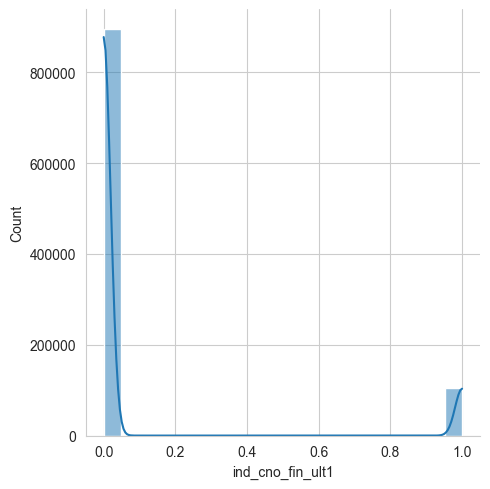

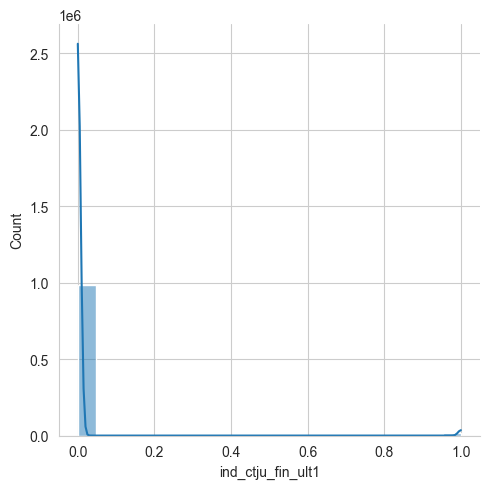

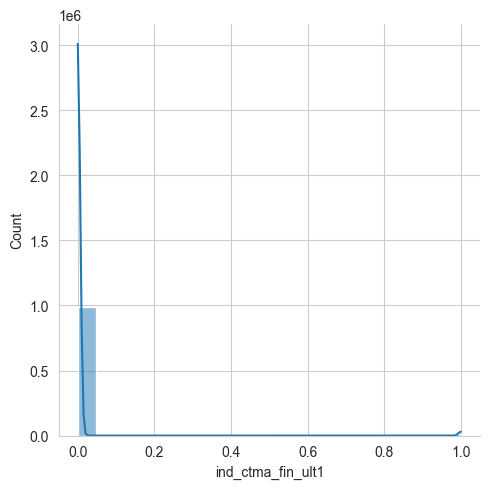

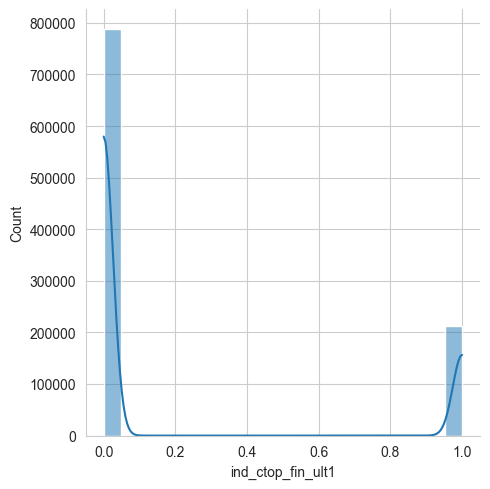

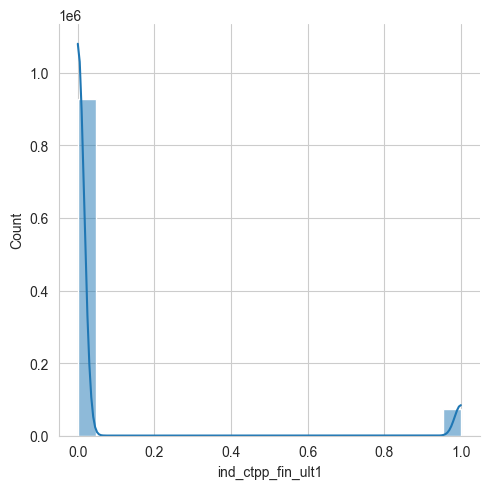

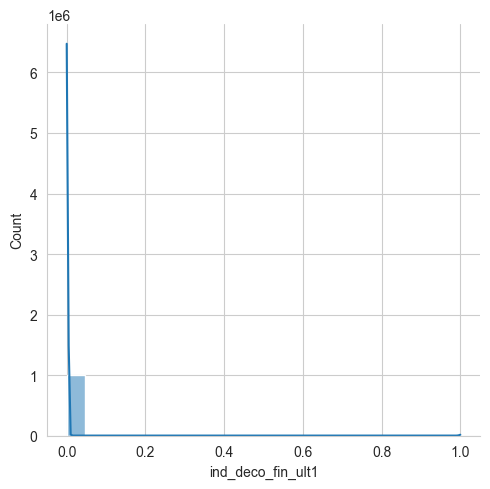

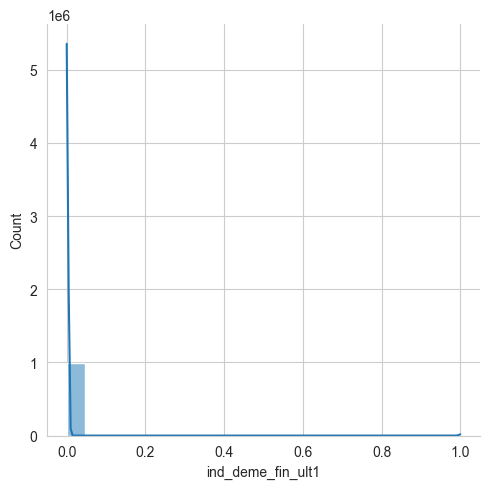

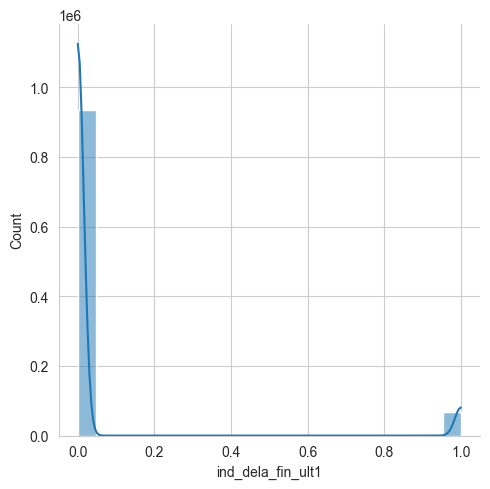

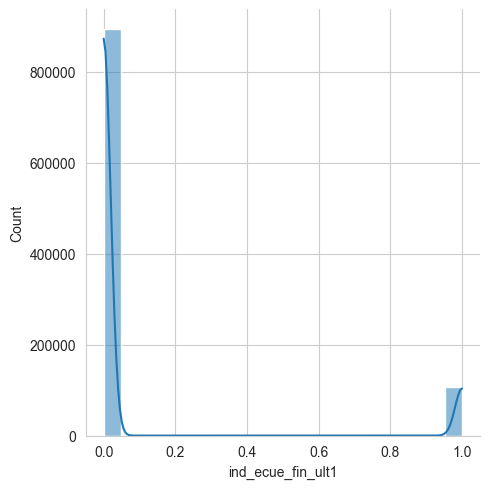

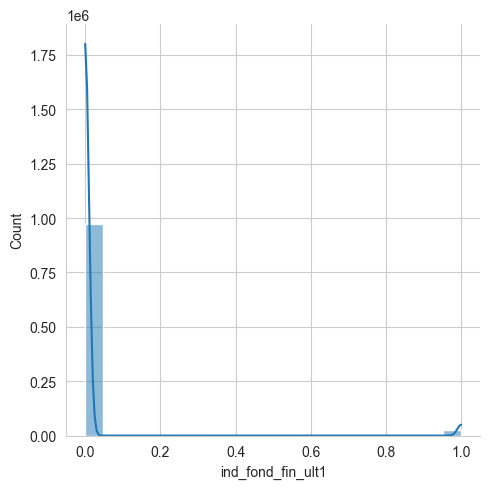

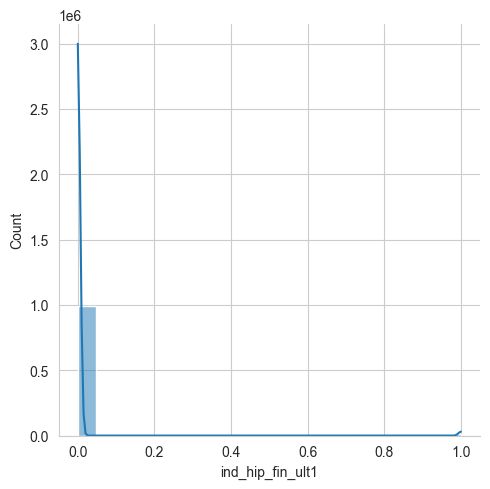

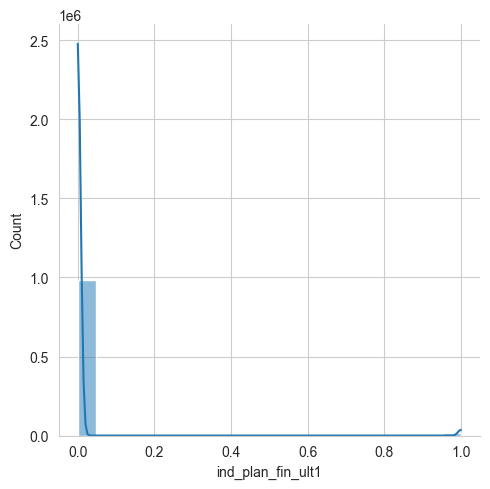

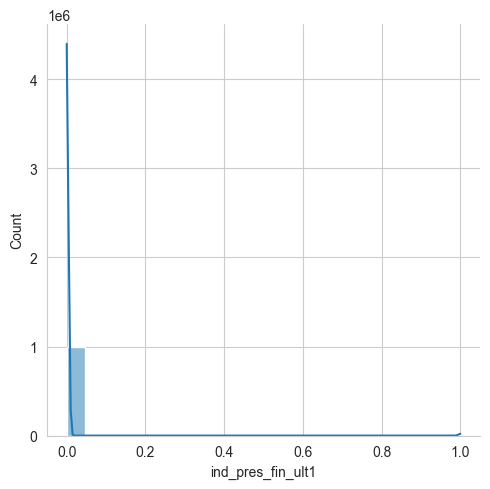

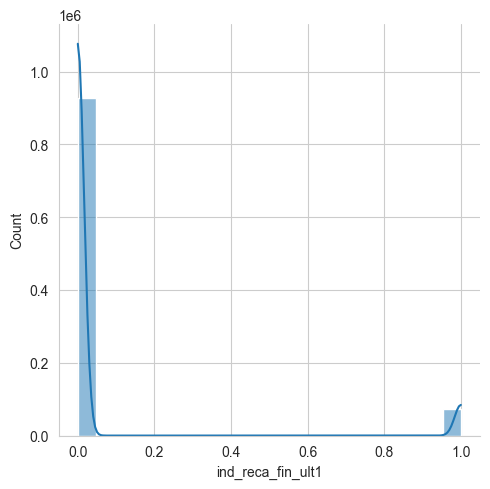

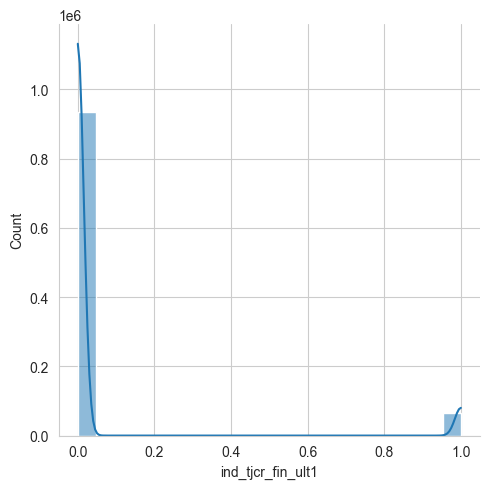

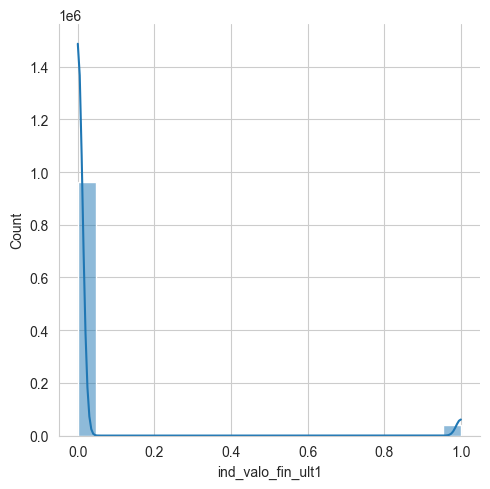

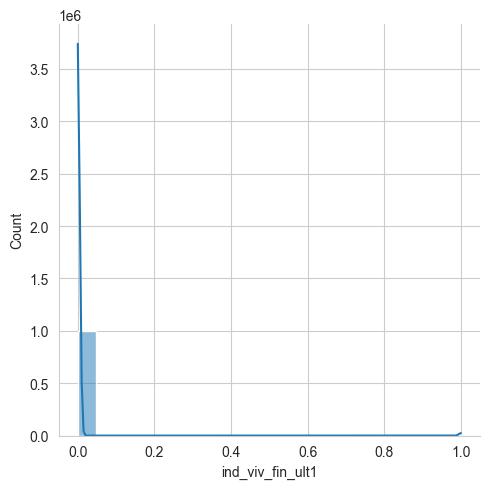

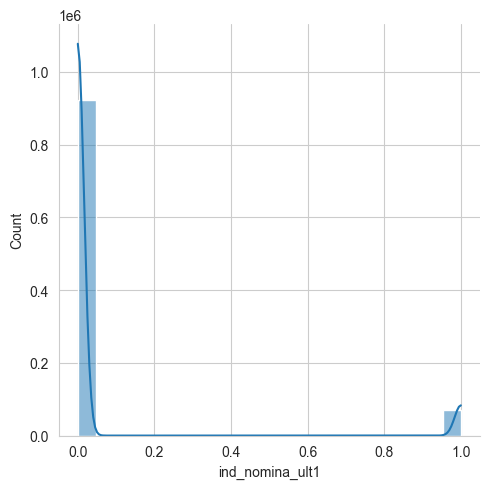

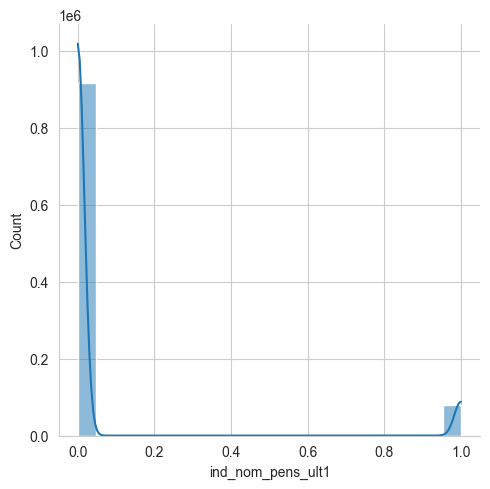

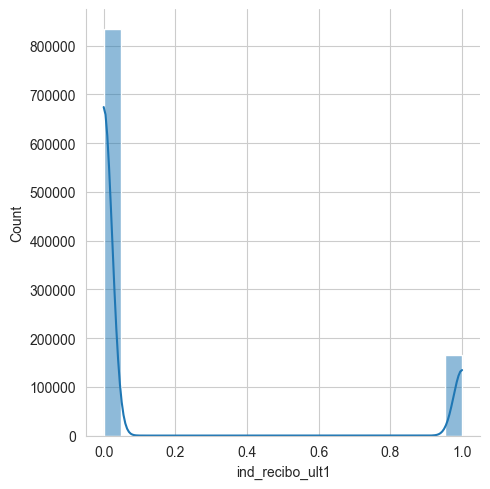

In [31]:
fig, ax = plt.subplots(8,4, figsize=(20,17))
ax = ax.ravel()
position = 0

for i in numericData:

    order = numericData[i].value_counts().index
    sns.displot(data=numericData, x=i, kde=True, ax=ax[position])
    ax[position].set_title(i)
    position += 1


# plt.subplots_adjust(hspace=0.7)
plt.show()


In [27]:
numericData.columns.value_counts()

ncodpers                 1
ind_nuevo                1
ind_nom_pens_ult1        1
ind_nomina_ult1          1
ind_viv_fin_ult1         1
ind_valo_fin_ult1        1
ind_tjcr_fin_ult1        1
ind_reca_fin_ult1        1
ind_pres_fin_ult1        1
ind_plan_fin_ult1        1
ind_hip_fin_ult1         1
ind_fond_fin_ult1        1
ind_ecue_fin_ult1        1
ind_dela_fin_ult1        1
ind_deme_fin_ult1        1
ind_deco_fin_ult1        1
ind_ctpp_fin_ult1        1
ind_ctop_fin_ult1        1
ind_ctma_fin_ult1        1
ind_ctju_fin_ult1        1
ind_cno_fin_ult1         1
ind_cder_fin_ult1        1
ind_cco_fin_ult1         1
ind_aval_fin_ult1        1
ind_ahor_fin_ult1        1
renta                    1
ind_actividad_cliente    1
cod_prov                 1
tipodom                  1
indrel_1mes              1
indrel                   1
ind_recibo_ult1          1
dtype: int64